In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## Data exploration

In [2]:
data = pd.read_csv('train.csv')

data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [4]:
# LifeSquare, Healthcare_1 - не полные данные. необходимо доработать.

In [5]:
# описательная статистика цифровых параметров
data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [6]:
# описательная статистика нецифровых параметров
data.describe(include=[np.object])

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [7]:
# параметры
data_columns = data.columns
data_columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [8]:
# Корреляция параметров
correlation = data.corr()
correlation

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381


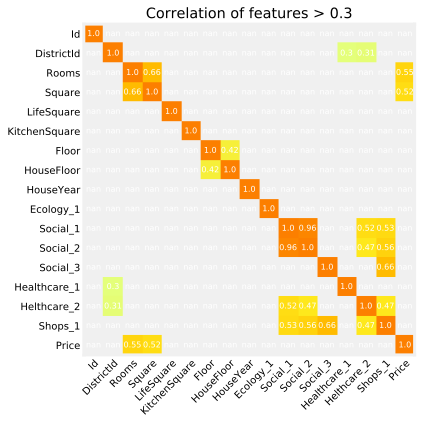

In [9]:
# прорисовываем температурную карту (heatmap) по перекрессной корреляции показателей
# для определения наиболее взаимозависимых показателей

# Размер графика
rcParams['figure.figsize'] = 6, 6
# Задаем отсекающий коэффициент корреляции. Ниже этого коэфф. считаем, что корреляция пары показателей не сильная.
correlation_rate_filter = 0.3

#Определяем колонки, столбцы и данные для построение heatmap
hm_index = correlation.index
hm_colums = correlation.columns
hm_data = np.array(correlation.where(correlation > abs(correlation_rate_filter))).round(2)


fig, ax = plt.subplots()
im = ax.imshow(hm_data, cmap="Wistia")

# Столбцы и индексы
ax.set_xticks(np.arange(len(hm_colums)))
ax.set_yticks(np.arange(len(hm_index)))
ax.set_xticklabels(hm_colums)
ax.set_yticklabels(hm_index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Подписи к столбцам и индексам.
for i in range(len(hm_index)):
    for j in range(len(hm_colums)):
        text = ax.text(j, i, hm_data[i, j],
                       ha="center", va="center", color="w", fontsize=8)

ax.set_title(f"Correlation of features > {correlation_rate_filter}")
fig.tight_layout()
plt.grid()
plt.show()

In [10]:
# Просматриваем гистограмму распределения показателей

# sns.set(style="ticks")
# sns_plot = sns.pairplot(data, hue='Rooms',
#             vars=['Rooms', 'Square','HouseYear', 'Price'],
#             diag_kind="kde")
# sns_plot.savefig('pairplot.png')

# Чистка данных.
1) Rooms 
2) square/lifesquare 
3) year
4) price 

# Чистка Rooms

In [10]:
data['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [13]:
data.groupby(['Rooms'])['Square', 'LifeSquare', 'Price'].mean()

,Square,LifeSquare,Price
Rooms,,,
0.0,81.620358,90.558075,200435.886261
1.0,41.323277,25.159008,159850.800729
2.0,56.788214,35.971895,215256.306416
3.0,76.903234,54.942865,289337.962452
4.0,98.377544,65.667066,383251.100956
5.0,122.614941,89.445712,410431.605679
6.0,59.414334,38.702244,229661.964416
10.0,59.964120,37.321877,244797.297328
19.0,42.006046,21.779288,78364.616704


In [14]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [15]:
# создание очищенной базы данных

clean_data = data.copy()

In [16]:
# создание вспомогательных коэффициентов

clean_data['r_squareVSrooms'] = clean_data['Square'] / clean_data['Rooms']
clean_data['r_lifesquareVSsquare'] = clean_data['LifeSquare'] / clean_data['Square']
clean_data['r_priceVSsquare'] = clean_data['Price'] / clean_data['Square']
clean_data['r_priceVSrooms'] = clean_data['Price'] / clean_data['Rooms']

clean_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,NaN,0,11,B,184966.930730,23.990781,0.613626,3854.958571,92483.465365
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,21.894547,0.609734,4567.491245,100003.150021
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,22.473976,0.649587,4915.149522,110462.954262
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,26.676491,0.988352,3291.591637,87808.113609
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,39.649192,0.599663,3788.892642,150226.531644


In [17]:
# сводный отчет по комнатам
clean_data.groupby(['Rooms'])['Square', 'LifeSquare', 'Price', 'r_squareVSrooms',
                              'r_lifesquareVSsquare', 'r_priceVSsquare', 'r_priceVSrooms'].agg(['mean', 'count'])

Square       LifeSquare                Price       r_squareVSrooms  \
             mean count       mean count           mean count            mean   
Rooms                                                                           
0.0     81.620358     8  90.558075     5  200435.886261     8             inf   
1.0     41.323277  3705  25.159008  2827  159850.800729  3705       41.323277   
2.0     56.788214  3880  35.971895  3052  215256.306416  3880       28.394107   
3.0     76.903234  2235  54.942865  1842  289337.962452  2235       25.634411   
4.0     98.377544   150  65.667066   141  383251.100956   150       24.594386   
5.0    122.614941    18  89.445712    16  410431.605679    18       24.522988   
6.0     59.414334     1  38.702244     1  229661.964416     1        9.902389   
10.0    59.964120     2  37.321877     2  244797.297328     2        5.996412   
19.0    42.006046     1  21.779288     1   78364.616704     1        2.210845   

            r_lifesquareVSsquare       r_priceVSsquare       r_priceVSrooms  \
      count                 mean count            mean count           mean   
Rooms                                                                         
0.0       8             0.762637     5     9070.603357     8            inf   
1.0    3705             0.624116  2827     4149.078925  3705   1.598508e+05   
2.0    3880             0.659366  3052     3905.231064  3880   1.076282e+05   
3.0    2235             0.739305  1842     3851.163217  2235   9.644599e+04   
4.0     150             0.677641   141     3998.205057   150   9.581278e+04   
5.0      18             0.718663    16     3645.790620    18   8.208632e+04   
6.0       1             0.651396     1     3865.430271     1   3.827699e+04   
10.0      2             0.622269     2     4101.617604     2   2.447973e+04   
19.0      1             0.518480     1     1865.555669     1   4.124454e+03   

             
      count  
Rooms        
0.0       8  
1.0    3705  
2.0    3880  
3.0    2235  
4.0     150  
5.0      18  
6.0       1  
10.0      2  
19.0      1

In [18]:
# записи с Rooms - 6 и 10 скорее всего ошибочны по количеству комнат
# - исправить количество комнат на округленное значение Square против
# среднего значения r_squareVSrooms (без учета анномальных значений)
# записи с нулевыми комнатами требует доп.проверки 

In [19]:
# Определяем медианное значение количества кв.м. на 1 комнату
median_square_rooms = clean_data.loc[clean_data['Rooms'].between(1, 5), 'r_squareVSrooms'].median()
median_square_rooms

30.826755780102165

In [20]:
# Зачищаем занчения комнат свыше 5 комнат
clean_data.loc[clean_data['Rooms'] > 5, 'Rooms'] = clean_data['Square'] // median_square_rooms
clean_data.loc[clean_data['Rooms'] > 5, ('Rooms', 'Square')]

,Rooms,Square


In [21]:
# Проверка результатов зачистки
clean_data.groupby(['Rooms'])['Square', 'LifeSquare', 'Price', 'r_squareVSrooms',
                              'r_lifesquareVSsquare', 'r_priceVSsquare', 'r_priceVSrooms'].agg(['mean', 'count'])

Square       LifeSquare                Price       r_squareVSrooms  \
             mean count       mean count           mean count            mean   
Rooms                                                                           
0.0     81.620358     8  90.558075     5  200435.886261     8             inf   
1.0     41.338391  3709  25.171191  2831  159893.458581  3709       41.285211   
2.0     56.788214  3880  35.971895  3052  215256.306416  3880       28.394107   
3.0     76.903234  2235  54.942865  1842  289337.962452  2235       25.634411   
4.0     98.377544   150  65.667066   141  383251.100956   150       24.594386   
5.0    122.614941    18  89.445712    16  410431.605679    18       24.522988   

            r_lifesquareVSsquare       r_priceVSsquare       r_priceVSrooms  \
      count                 mean count            mean count           mean   
Rooms                                                                         
0.0       8             0.762637     5     9070.603357     8            inf   
1.0    3709             0.624087  2831     4148.361185  3709   1.597030e+05   
2.0    3880             0.659366  3052     3905.231064  3880   1.076282e+05   
3.0    2235             0.739305  1842     3851.163217  2235   9.644599e+04   
4.0     150             0.677641   141     3998.205057   150   9.581278e+04   
5.0      18             0.718663    16     3645.790620    18   8.208632e+04   

             
      count  
Rooms        
0.0       8  
1.0    3709  
2.0    3880  
3.0    2235  
4.0     150  
5.0      18

In [22]:
# проверка записей с нулевыми комнатами
clean_data.loc[clean_data['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,...,0,NaN,0,0,B,268394.744389,inf,0.984019,1938.880408,inf
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,...,0,NaN,0,1,B,302211.260887,inf,0.992010,1419.282909,inf
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,...,0,NaN,0,1,B,98129.976788,inf,NaN,2348.119347,inf
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,...,1,1183.0,1,0,B,217009.338463,inf,NaN,4385.488771,inf
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,...,0,540.0,0,0,B,212864.799112,inf,NaN,2612.112170,inf
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,0,NaN,0,0,B,126596.941798,inf,0.367293,53253.578837,inf
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,...,3,NaN,3,9,B,158998.110646,inf,0.499911,4108.784399,inf
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,...,0,NaN,0,1,B,219281.918007,inf,0.969951,2498.580012,inf


In [23]:
# запись 4853 имеет аномальные значения по многим показателям - лучше удалить
clean_data = clean_data.drop(4853, axis=0)
clean_data.loc[clean_data['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,...,0,NaN,0,0,B,268394.744389,inf,0.984019,1938.880408,inf
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,...,0,NaN,0,1,B,302211.260887,inf,0.992010,1419.282909,inf
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,...,0,NaN,0,1,B,98129.976788,inf,NaN,2348.119347,inf
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,...,1,1183.0,1,0,B,217009.338463,inf,NaN,4385.488771,inf
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,...,0,540.0,0,0,B,212864.799112,inf,NaN,2612.112170,inf
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,...,3,NaN,3,9,B,158998.110646,inf,0.499911,4108.784399,inf
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,...,0,NaN,0,1,B,219281.918007,inf,0.969951,2498.580012,inf


In [24]:
# назначаем нулевым комнатам новое количество комнат исходя из медианного значений кв.м./комната
clean_data.loc[clean_data['Rooms'] == 0, 'Rooms'] = clean_data['Square'] // median_square_rooms
clean_data.loc[clean_data['Rooms'] == 0, ('Rooms', 'Square')]

,Rooms,Square


In [25]:
# пересчитываем коэффициенты

clean_data['r_squareVSrooms'] = clean_data['Square'] / clean_data['Rooms']
clean_data['r_lifesquareVSsquare'] = clean_data['LifeSquare'] / clean_data['Square']
clean_data['r_priceVSsquare'] = clean_data['Price'] / clean_data['Square']
clean_data['r_priceVSrooms'] = clean_data['Price'] / clean_data['Rooms']

clean_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,NaN,0,11,B,184966.930730,23.990781,0.613626,3854.958571,92483.465365
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,21.894547,0.609734,4567.491245,100003.150021
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,22.473976,0.649587,4915.149522,110462.954262
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,26.676491,0.988352,3291.591637,87808.113609
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,39.649192,0.599663,3788.892642,150226.531644


In [26]:
# Проверка результатов зачистки
clean_data.groupby(['Rooms'])['Square', 'LifeSquare', 'Price', 'r_squareVSrooms',
                              'r_lifesquareVSsquare', 'r_priceVSsquare', 'r_priceVSrooms'].agg(['mean', 'count'])

Square        LifeSquare                Price        \
             mean count        mean count           mean count   
Rooms                                                            
1.0     41.339995  3712   25.169133  2832  159891.965329  3712   
2.0     56.802556  3882   35.987995  3053  215256.727360  3882   
3.0     76.903234  2235   54.942865  1842  289337.962452  2235   
4.0     98.642776   151   66.163886   142  382490.462833   151   
5.0    122.614941    18   89.445712    16  410431.605679    18   
6.0    212.932361     1  211.231125     1  302211.260887     1   

      r_squareVSrooms       r_lifesquareVSsquare       r_priceVSsquare        \
                 mean count                 mean count            mean count   
Rooms                                                                          
1.0         41.339995  3712             0.624043  2832     4147.929426  3712   
2.0         28.401278  3882             0.659467  3053     3904.535606  3882   
3.0         25.634411  2235             0.739305  1842     3851.163217  2235   
4.0         24.660694   151             0.679799   142     3984.567146   151   
5.0         24.522988    18             0.718663    16     3645.790620    18   
6.0         35.488727     1             0.992010     1     1419.282909     1   

      r_priceVSrooms        
                mean count  
Rooms                       
1.0    159891.965329  3712  
2.0    107628.363680  3882  
3.0     96445.987484  2235  
4.0     95622.615708   151  
5.0     82086.321136    18  
6.0     50368.543481     1

# Зачистка HouseYear

In [27]:
clean_data['HouseYear'].value_counts()

1977        2651
2017         308
2016         305
2015         299
2014         210
1970         194
1969         190
1972         178
1971         177
2018         175
1974         169
1968         162
1965         161
1963         158
1976         155
1973         150
1964         150
1975         150
1967         146
1966         140
1978         129
1962         125
1960         121
1961         113
1982         111
1981         108
1979         107
1980         107
2005         102
1983         101
            ... 
1952          10
1953          10
1931           7
1935           7
1950           7
1939           6
1918           5
1933           5
1937           5
1934           4
1938           4
1951           4
1940           4
1930           3
1942           3
1936           3
1919           3
1917           3
1912           2
1929           2
1932           2
1948           2
1941           2
4968           1
1914           1
1947           1
1916           1
1910          

In [28]:
# Заменяем занчения года 20052011 на 2005
clean_data.loc[clean_data['HouseYear'] == 20052011, 'HouseYear'] = 2005
clean_data.loc[clean_data['HouseYear'] == 20052011]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms


In [29]:
clean_data['HouseYear'].describe()

count    9999.000000
mean     1985.166517
std        35.056808
min      1910.000000
25%      1974.000000
50%      1977.000000
75%      2001.000000
max      4968.000000
Name: HouseYear, dtype: float64

In [30]:
# Зачищаем занчения года больше 2017 на 1977
clean_data.loc[clean_data['HouseYear'] > 2017, 'HouseYear'] = 1977
clean_data.loc[clean_data['HouseYear'] > 2017]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms


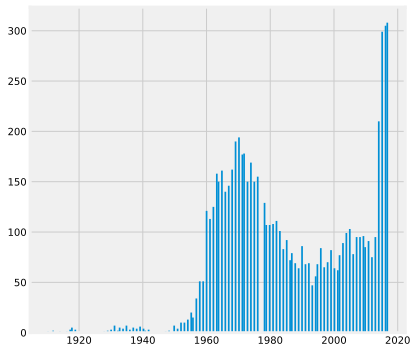

In [31]:
# визуализация распределения квартир по годам за исключением 1977 (аномальное количество записей в 1977)
plt.hist(clean_data.loc[clean_data['HouseYear'] != 1977, 'HouseYear'], bins=200)
plt.show()

In [32]:
# группировка HouseYear
bins_houseyear = np.array([1900, 1920, 1950, 1970, 1990, 2010, 2020])
clean_data['HouseYearGroup'] = np.digitize(clean_data['HouseYear'], bins_houseyear)
clean_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms,HouseYearGroup
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,NaN,0,11,B,184966.930730,23.990781,0.613626,3854.958571,92483.465365,3
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,B,300009.450063,21.894547,0.609734,4567.491245,100003.150021,4
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,229.0,1,3,B,220925.908524,22.473976,0.649587,4915.149522,110462.954262,3
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,B,175616.227217,26.676491,0.988352,3291.591637,87808.113609,4
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,B,150226.531644,39.649192,0.599663,3788.892642,150226.531644,4


In [33]:
# Проверка результатов зачисткипо группам Houseyear
clean_data.groupby(['HouseYearGroup'])['Square', 'LifeSquare', 'Price', 'r_squareVSrooms',
                              'r_lifesquareVSsquare', 'r_priceVSsquare', 'r_priceVSrooms'].agg(['mean', 'count'])

Square       LifeSquare                Price        \
                     mean count       mean count           mean count   
HouseYearGroup                                                          
1               69.412621    16  42.032613    16  350152.039735    16   
2               69.439403    61  45.939321    61  358894.755684    61   
3               48.000972  1681  31.441654  1681  217586.181687  1681   
4               56.028217  5220  36.081470  3337  199812.403026  5220   
5               60.046299  1553  34.979359  1553  261772.104991  1553   
6               62.261678  1468  50.353534  1238  203305.020469  1468   

               r_squareVSrooms       r_lifesquareVSsquare        \
                          mean count                 mean count   
HouseYearGroup                                                    
1                    33.614908    16             0.602840    16   
2                    25.692525    61             0.652618    61   
3                    26.629201  1681             0.651644  1681   
4                    32.944345  5220             0.670919  3337   
5                    33.309582  1553             0.573203  1553   
6                    37.216194  1468             0.789624  1238   

               r_priceVSsquare       r_priceVSrooms        
                          mean count           mean count  
HouseYearGroup                                             
1                  5535.157764    16  180260.109195    16  
2                  5343.430152    61  136017.127420    61  
3                  4555.699640  1681  121482.358221  1681  
4                  3828.111086  5220  118747.008514  5220  
5                  4389.937102  1553  146104.610181  1553  
6                  3377.131572  1468  123094.760006  1468

In [42]:
# Проверка распределение квартир по Областям с HouseYear == 1977
tab = clean_data.loc[clean_data['HouseYear'] == 1977].groupby(['DistrictId'])['Square', 'LifeSquare', 'Price', 'r_squareVSrooms',
                              'r_lifesquareVSsquare', 'r_priceVSsquare', 'r_priceVSrooms'].agg(['mean', 'count'])
tab

Square        LifeSquare                Price        \
                  mean count        mean count           mean count   
DistrictId                                                            
0            63.311369     2         NaN     0  160771.617067     2   
1            59.850896   498   52.691633   142  192238.011374   498   
2            60.193321     5   39.352204     5  262863.872295     5   
3            43.071894     5   25.823060     5  162795.201888     5   
5            45.333184     7   27.918603     6  301501.386554     7   
6            58.136172   338   31.580368    71  165318.861614   338   
7            52.621911     2   42.385479     1  286216.556703     2   
8            63.001968     2   39.728541     2  213511.861050     2   
9            68.546586    99   32.632937    43  185818.444859    99   
11           54.052025    10   36.020921    10  190983.944376    10   
14           59.143612     3   55.200308     3  211102.188119     3   
17          131.798226     4  101.525114     1  559687.311745     4   
18           66.047513     1   46.353477     1  219998.530312     1   
20           41.485165     1   18.578370     1   91735.781687     1   
21           59.703969     3   40.547882     3  227401.115671     3   
22           56.867434    37   33.452938     7  182405.063368    37   
23           56.662630   426   53.542474   113  129047.215893   426   
24           64.125573     4   41.741790     1  344048.111938     4   
25           66.033979    25   45.327652    13  267737.801313    25   
26           44.074920     3   31.609131     3  225290.343985     3   
27           58.162302   465   42.552377   177  155104.042692   465   
28           44.117515     3   27.249158     3  250230.991049     3   
29           42.455163     1   21.182454     1  171503.249613     1   
30           64.900431   135   66.053213    37  161504.427949   135   
31           54.405076     7   30.440510     7  335586.827161     7   
33           42.346036    20   48.579636     1  210465.411619    20   
34           70.299800    38   46.378961    19  299286.904806    38   
35           47.615479     3   18.185922     1  208553.935333     3   
37           66.248715     3   63.457170     2  324209.943451     3   
38           77.169795    19   66.275705    14  370750.703304    19   
...                ...   ...         ...   ...            ...   ...   
100          35.895583     1   14.709211     1  146060.096904     1   
101          39.297878     1   23.445541     1  149302.915128     1   
105          75.775988     1   39.114521     1  417308.993487     1   
108          43.035536     1   23.273999     1  206855.915212     1   
109          76.759563     1   45.416096     1  471668.734089     1   
112          59.085898     1   44.149627     1  264107.868909     1   
113          90.074286     2   76.847961     2  344488.284606     2   
120          89.374665     2   77.976325     1  565746.525278     2   
121          50.338281     3   26.417574     2  210059.694208     3   
124          55.336602     3   31.770552     3  283683.317324     3   
126          54.962161     1   31.302778     1  213349.414976     1   
128          61.305754     4   37.969146     3  201398.869595     4   
129          65.683469     1   43.533322     1  313452.535235     1   
132          55.088644     1   32.424492     1  260146.725695     1   
134          44.178596     4   36.988444     2  174841.800837     4   
138          73.738049     1   74.784769     1  372318.038349     1   
140          40.686559     1   22.376756     1  209191.128624     1   
147          44.791836     1   28.360393     1  243028.603096     1   
148          95.829697     1         NaN     0  430767.107023     1   
155          66.258469     1   45.437252     1  310139.659847     1   
160          48.448052     2   29.444630     2  207810.571281     2   
163          49.970525     1   28.944654     1  319579.465429     1   
165          40.781752     1   19.251596

# зачистка Square и LifeSquare 

In [44]:
# проверка записей где жилая площадь превышает общею площадь
clean_data.loc[clean_data['LifeSquare'] > clean_data['Square']].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,482.0,8267.912863,4920.619796,10.000000,3917.000000,8180.500000,12375.000000,16781.000000
DistrictId,482.0,32.902490,28.090306,1.000000,8.250000,27.000000,48.000000,187.000000
Rooms,482.0,1.773859,0.810983,1.000000,1.000000,2.000000,2.000000,4.000000
Square,482.0,58.730783,29.209970,1.136859,40.818859,53.797480,70.938033,409.425181
LifeSquare,482.0,77.562913,339.778223,2.642219,42.247472,56.007028,73.066011,7480.592129
KitchenSquare,482.0,3.767635,8.857379,0.000000,1.000000,1.000000,5.000000,123.000000
Floor,482.0,9.844398,6.236391,1.000000,4.000000,9.000000,14.000000,28.000000
HouseFloor,482.0,13.699170,9.918523,0.000000,6.000000,17.000000,17.000000,117.000000
HouseYear,482.0,1993.726141,19.425418,1958.000000,1977.000000,1977.000000,2015.750000,2017.000000
Ecology_1,482.0,0.103546,0.111658,0.000000,0.011654,0.072158,0.195781,0.486246


In [45]:
# анализ данных по комнатам
clean_data.loc[clean_data['LifeSquare'] > clean_data['Square']].groupby(['Rooms'])['Square', 'LifeSquare', 'Price', 'r_squareVSrooms',
                              'r_lifesquareVSsquare', 'r_priceVSsquare', 'r_priceVSrooms'].agg(['mean', 'count'])

Square        LifeSquare                Price        \
             mean count        mean count           mean count   
Rooms                                                            
1.0     43.513257   218   45.903088   218  160334.390943   218   
2.0     62.349749   162   65.617913   162  211067.488017   162   
3.0     82.723374    95  167.094363    95  260750.581612    95   
4.0    123.281082     7  124.912043     7  354287.333813     7   

      r_squareVSrooms       r_lifesquareVSsquare       r_priceVSsquare        \
                 mean count                 mean count            mean count   
Rooms                                                                          
1.0         43.513257   218             1.117552   218     7150.960705   218   
2.0         31.174874   162             1.123138   162     3772.481843   162   
3.0         27.574458    95             2.193614    95     4052.688938    95   
4.0         30.820270     7             1.014288     7     2890.193778     7   

      r_priceVSrooms        
                mean count  
Rooms                       
1.0    160334.390943   218  
2.0    105533.744009   162  
3.0     86916.860537    95  
4.0     88571.833453     7

In [46]:
# коэффициент перевода из Square в LifeSquare
median_ratio_sqm_to_lifesqm = clean_data.loc[clean_data['LifeSquare'] < clean_data['Square'], 'r_lifesquareVSsquare'].median()
median_ratio_sqm_to_lifesqm

0.610603619360131

In [47]:
# переназначение ошибочной живой площади исходя из соотношения медианного соотношения кв.м. жилая/общая
clean_data.loc[clean_data['LifeSquare'] > clean_data['Square'], 'LifeSquare'] = clean_data['Square'] * median_ratio_sqm_to_lifesqm

In [48]:
# проверка
clean_data.loc[clean_data['LifeSquare'] > clean_data['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms,HouseYearGroup


In [49]:
# зачистка пустых данных по LifeSquare

In [51]:
clean_data.loc[clean_data['LifeSquare'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2113.0,8256.636062,4835.706043,28.000000,3917.000000,8308.000000,12357.000000,16777.000000
DistrictId,2113.0,26.999527,24.928012,0.000000,6.000000,23.000000,33.000000,190.000000
Rooms,2113.0,1.780880,0.761760,1.000000,1.000000,2.000000,2.000000,5.000000
Square,2113.0,60.352646,22.846588,17.414181,43.624731,58.634866,68.843287,604.705972
LifeSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,2113.0,1.383814,2.725244,0.000000,1.000000,1.000000,1.000000,62.000000
Floor,2113.0,9.913393,5.563304,1.000000,5.000000,9.000000,14.000000,27.000000
HouseFloor,2113.0,13.248935,8.091366,0.000000,4.000000,17.000000,17.000000,30.000000
HouseYear,2113.0,1981.200189,12.026689,1977.000000,1977.000000,1977.000000,1977.000000,2017.000000
Ecology_1,2113.0,0.105183,0.113981,0.000000,0.007122,0.072158,0.197368,0.437885


In [52]:
# заполнение пустых данных по LifeSquare
clean_data.loc[clean_data['LifeSquare'].isnull(), 'LifeSquare'] = clean_data['Square'] * median_ratio_sqm_to_lifesqm
clean_data.loc[clean_data['LifeSquare'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistrictId,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Square,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LifeSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseFloor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseYear,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecology_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 25 columns):
Id                      9999 non-null int64
DistrictId              9999 non-null int64
Rooms                   9999 non-null float64
Square                  9999 non-null float64
LifeSquare              9999 non-null float64
KitchenSquare           9999 non-null float64
Floor                   9999 non-null int64
HouseFloor              9999 non-null float64
HouseYear               9999 non-null int64
Ecology_1               9999 non-null float64
Ecology_2               9999 non-null object
Ecology_3               9999 non-null object
Social_1                9999 non-null int64
Social_2                9999 non-null int64
Social_3                9999 non-null int64
Healthcare_1            5202 non-null float64
Helthcare_2             9999 non-null int64
Shops_1                 9999 non-null int64
Shops_2                 9999 non-null object
Price                   9999 non-null fl

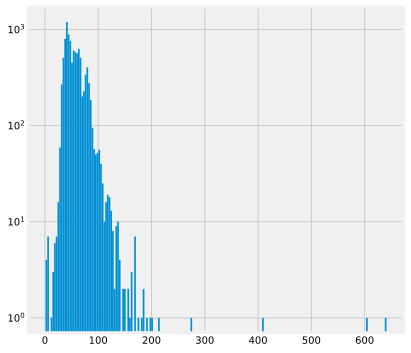

In [54]:
# проверка распределения значения общей площади на экстремумы
plt.hist(clean_data['Square'], bins=200, log=True)
plt.show()

In [55]:
# Удаление записей с общей площадью более 250
clean_data = clean_data.drop(clean_data.loc[clean_data['Square'] > 250].index)
clean_data.loc[clean_data['Square'] > 250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms,HouseYearGroup


# Чистка Price

In [56]:
# пересчитываем коэффициенты

clean_data['r_squareVSrooms'] = clean_data['Square'] / clean_data['Rooms']
clean_data['r_lifesquareVSsquare'] = clean_data['LifeSquare'] / clean_data['Square']
clean_data['r_priceVSsquare'] = clean_data['Price'] / clean_data['Square']
clean_data['r_priceVSrooms'] = clean_data['Price'] / clean_data['Rooms']

In [57]:
# средквадратичное отклонение от среднего значения показателя цена/кв.м.
std_priceVSsqm = clean_data['r_priceVSsquare'].std()
std_priceVSsqm

3723.271456445881

In [58]:
# среднее значение цена/кв.м.
mean_priceVSsqm = clean_data['r_priceVSsquare'].mean()
mean_priceVSsqm

3984.811692876153

In [59]:
# описательная статистика записей сверх std
clean_data.loc[clean_data['r_priceVSsquare'] > (mean_priceVSsqm + std_priceVSsqm)].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,67.0,9035.656716,4283.561031,69.000000,6207.000000,9161.000000,12577.500000,16060.000000
DistrictId,67.0,111.731343,65.834867,1.000000,47.500000,108.000000,181.000000,208.000000
Rooms,67.0,1.776119,0.755202,1.000000,1.000000,2.000000,2.000000,3.000000
Square,67.0,42.870325,20.638552,1.136859,36.654314,45.787482,55.620425,78.824038
LifeSquare,67.0,27.492240,14.608445,0.694170,19.605778,29.668130,36.655265,62.237505
KitchenSquare,67.0,5.164179,3.409421,0.000000,1.000000,6.000000,8.000000,13.000000
Floor,67.0,8.432836,5.606338,1.000000,5.000000,7.000000,10.000000,28.000000
HouseFloor,67.0,11.014925,6.409020,0.000000,8.000000,9.000000,16.000000,25.000000
HouseYear,67.0,1977.910448,25.083335,1918.000000,1962.500000,1977.000000,2003.500000,2017.000000
Ecology_1,67.0,0.060274,0.081353,0.000000,0.000000,0.037316,0.081943,0.282798


In [60]:
# описательная статистика записей ниже std
clean_data.loc[clean_data['r_priceVSsquare'] < (mean_priceVSsqm - std_priceVSsqm)].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistrictId,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Square,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LifeSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseFloor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseYear,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecology_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# удаление от записей с экстремельными значения priceVSsqm
clean_data = clean_data.drop(clean_data.loc[clean_data['r_priceVSsquare'] > (mean_priceVSsqm + std_priceVSsqm)].index)
clean_data.loc[clean_data['r_priceVSsquare'] > (mean_priceVSsqm + std_priceVSsqm)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,r_squareVSrooms,r_lifesquareVSsquare,r_priceVSsquare,r_priceVSrooms,HouseYearGroup


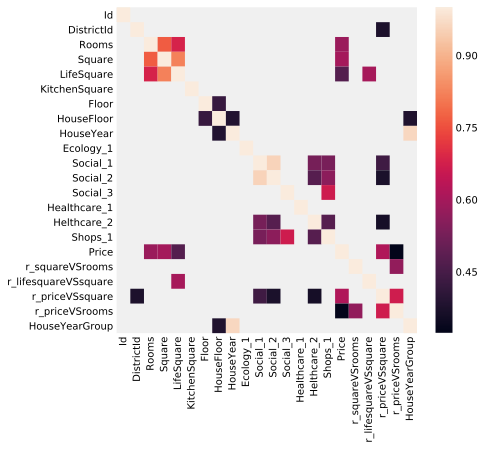

In [62]:
# проверка корреляции парных показателей
correlation_clean = clean_data.corr()
sns.heatmap(correlation_clean.where(correlation_clean > abs(correlation_rate_filter)))

In [63]:
# визуализация по парной зависимости ключевых показателей
# sns.set(style="ticks")
# sns_plot = sns.pairplot(clean_data, hue='HouseYearGroup',
#            vars=['Rooms', 'Square','HouseYear', 'Price'],
#            diag_kind="kde")
# sns_plot.savefig('pairplot_clean.png')

In [64]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9928 entries, 0 to 9999
Data columns (total 25 columns):
Id                      9928 non-null int64
DistrictId              9928 non-null int64
Rooms                   9928 non-null float64
Square                  9928 non-null float64
LifeSquare              9928 non-null float64
KitchenSquare           9928 non-null float64
Floor                   9928 non-null int64
HouseFloor              9928 non-null float64
HouseYear               9928 non-null int64
Ecology_1               9928 non-null float64
Ecology_2               9928 non-null object
Ecology_3               9928 non-null object
Social_1                9928 non-null int64
Social_2                9928 non-null int64
Social_3                9928 non-null int64
Healthcare_1            5150 non-null float64
Helthcare_2             9928 non-null int64
Shops_1                 9928 non-null int64
Shops_2                 9928 non-null object
Price                   9928 non-null fl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29d2f828>,
      dtype=object)

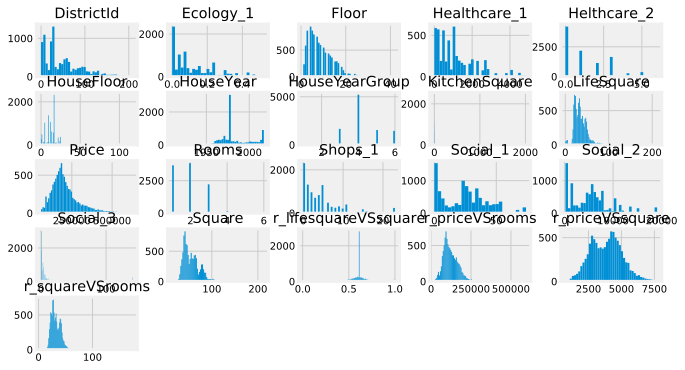

In [65]:
# визуализация распределениях всех показателей за исключением 4х
features = list(set(clean_data.columns) - set(['Id', 'Ecology_2', 'Ecology_3', 'Shops_2']))
clean_data[features].hist(bins='auto', figsize=(10,6))

In [67]:
# удаление поля с плохим качеством данных
clean_data = clean_data.drop(['Healthcare_1', 'KitchenSquare'], axis=1)

# удалить вспомогательные коэфициенты
clean_data = clean_data.drop(['r_priceVSsquare', 'r_priceVSrooms'], axis=1)

In [68]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9928 entries, 0 to 9999
Data columns (total 21 columns):
Id                      9928 non-null int64
DistrictId              9928 non-null int64
Rooms                   9928 non-null float64
Square                  9928 non-null float64
LifeSquare              9928 non-null float64
Floor                   9928 non-null int64
HouseFloor              9928 non-null float64
HouseYear               9928 non-null int64
Ecology_1               9928 non-null float64
Ecology_2               9928 non-null object
Ecology_3               9928 non-null object
Social_1                9928 non-null int64
Social_2                9928 non-null int64
Social_3                9928 non-null int64
Helthcare_2             9928 non-null int64
Shops_1                 9928 non-null int64
Shops_2                 9928 non-null object
Price                   9928 non-null float64
r_squareVSrooms         9928 non-null float64
r_lifesquareVSsquare    9928 non-null fl

# построение обучающих моделей

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [70]:
# разбиение данных на тренировочные и тестовые датасеты

In [71]:
clean_data.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,9928,9928,9928
unique,2,2,2
top,B,B,B
freq,9831,9655,9104


In [72]:
clean_data['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [73]:
clean_data['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [74]:
clean_data['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [75]:
# перевод текстовых значений в цифровое для бинарных объектов
clean_data['Ecology_2'] = (clean_data['Ecology_2'] == 'A').astype(int)
clean_data['Ecology_3'] = (clean_data['Ecology_3'] == 'A').astype(int)
clean_data['Shops_2'] = (clean_data['Shops_2'] == 'A').astype(int)

In [76]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9928 entries, 0 to 9999
Data columns (total 21 columns):
Id                      9928 non-null int64
DistrictId              9928 non-null int64
Rooms                   9928 non-null float64
Square                  9928 non-null float64
LifeSquare              9928 non-null float64
Floor                   9928 non-null int64
HouseFloor              9928 non-null float64
HouseYear               9928 non-null int64
Ecology_1               9928 non-null float64
Ecology_2               9928 non-null int64
Ecology_3               9928 non-null int64
Social_1                9928 non-null int64
Social_2                9928 non-null int64
Social_3                9928 non-null int64
Helthcare_2             9928 non-null int64
Shops_1                 9928 non-null int64
Shops_2                 9928 non-null int64
Price                   9928 non-null float64
r_squareVSrooms         9928 non-null float64
r_lifesquareVSsquare    9928 non-null float

In [166]:
# список показателей без целевого показателя 
feature_name = [
#     'HouseYearGroup'
     'Id'
    ,  'Helthcare_2'
     , 'HouseFloor'
#     , 'r_lifesquareVSsquare'
    , 'Square'
    , 'LifeSquare'
    , 'Rooms'
    , 'Shops_1'
    , 'Shops_2'
    , 'Social_2'
    , 'DistrictId'
    , 'Social_3'
    , 'HouseYear'
#     , 'r_squareVSrooms'
    , 'Ecology_1'
    , 'Floor'
    , 'Ecology_3'
    , 'Ecology_2'
    , 'Social_1'
]

In [167]:
# создание фрейма с целевыми значениями
target_clean = clean_data[['Price']]
target_clean.head()

,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644


In [168]:
# создание очищенной базы данных с параметрами
data_clean = clean_data[feature_name]
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,9928.0,8380.940673,4862.216646,0.000000,4158.750000,8391.500000,12594.250000,16798.000000
Helthcare_2,9928.0,1.311442,1.488853,0.000000,0.000000,1.000000,2.000000,6.000000
HouseFloor,9928.0,12.618654,6.772447,0.000000,9.000000,13.000000,17.000000,117.000000
Square,9928.0,56.240151,18.978688,13.784865,41.784623,52.541997,65.934639,212.932361
LifeSquare,9928.0,35.034902,15.147229,0.370619,23.850731,32.602006,43.574711,211.231125
Rooms,9928.0,1.888799,0.812616,1.000000,1.000000,2.000000,2.000000,6.000000
Shops_1,9928.0,4.215250,4.794424,0.000000,1.000000,3.000000,6.000000,23.000000
Shops_2,9928.0,0.082998,0.275892,0.000000,0.000000,0.000000,0.000000,1.000000
Social_2,9928.0,5352.339041,4014.787436,168.000000,1564.000000,5285.000000,7227.000000,19083.000000
DistrictId,9928.0,49.986704,43.111687,0.000000,19.000000,35.000000,75.000000,209.000000


In [169]:
# разбиеные данных на обучающею и тестовые данные.
X_train, X_test, y_train, y_test = train_test_split(data_clean, target_clean,
                                                    test_size=0.25, random_state=42)

In [170]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7446, 17), (7446, 1), (2482, 17), (2482, 1))

# Линейная регрессия

In [171]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [172]:
# обучение модели
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
# предсказание целевого значения для тествой базы
y_pred = lr.predict(X_test)

In [174]:
# оценка точности предсказания
r2(y_test, y_pred)

0.558770483531716

In [175]:
# оценка величины средне квадратичной ошибки
mse(y_test, y_pred)

4043491137.070282

Text(0, 0.5, 'Признак')

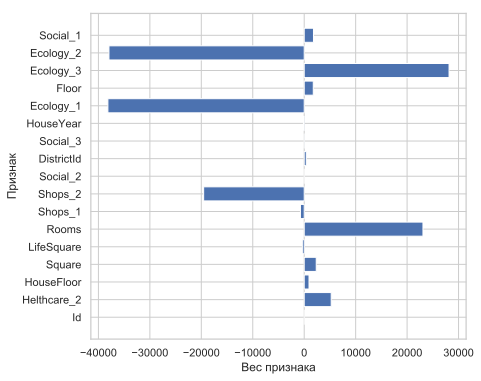

In [176]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [163]:
# переформатирование результатов предсказания в формат DataFrame
y_pred = pd.DataFrame(y_pred)

In [164]:
# запись результатов в файл .csv
y_pred.to_csv('predict.csv', sep=';', index=False)

# работа с test.csv

In [113]:
test_data = pd.read_csv('test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [115]:
# перевод текстовых значений в цифровое для бинарных объектов
test_data['Ecology_2'] = (test_data['Ecology_2'] == 'A').astype(int)
test_data['Ecology_3'] = (test_data['Ecology_3'] == 'A').astype(int)
test_data['Shops_2'] = (test_data['Shops_2'] == 'A').astype(int)

In [117]:
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,0,0,11,2748,1,NaN,0,0,0
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,0,0,6,1437,3,NaN,0,2,0
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,0,0,30,7538,87,4702.0,5,5,0
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,0,0,23,4583,3,NaN,3,3,0
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,0,0,2,629,1,NaN,0,0,1


In [118]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
dtypes: float64(7), int64(12)
memory usage: 742.3 KB


In [119]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


In [120]:
test_data['Rooms'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  6.,  0., 17.])

In [123]:
test_data.groupby(['Rooms'])['Square', 'LifeSquare'].agg(['mean', 'count'])

Square        LifeSquare      
             mean count        mean count
Rooms                                    
0.0     96.584677     2   78.256610     2
1.0     40.943143  1769   24.658750  1362
2.0     56.689144  2030   36.222168  1587
3.0     77.201304  1099   50.155374   915
4.0     94.501365    90   64.943345    84
5.0    115.788971     7   63.195393     7
6.0    167.101957     2  104.113552     1
17.0    52.866107     1   32.528342     1

In [125]:
# создание вспомогательных коэффициентов

test_data['r_squareVSrooms'] = test_data['Square'] / test_data['Rooms']
test_data['r_lifesquareVSsquare'] = test_data['LifeSquare'] / test_data['Square']

test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,r_squareVSrooms,r_lifesquareVSsquare
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,11,2748,1,NaN,0,0,0,24.941322,0.670229
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,0,6,1437,3,NaN,0,2,0,34.631592,NaN
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,0,30,7538,87,4702.0,5,5,0,13.597819,1.172853
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,0,23,4583,3,NaN,3,3,0,36.523305,0.711064
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,0,2,629,1,NaN,0,0,1,47.527111,0.912901


In [126]:
# сводный отчет по комнатам
test_data.groupby(['Rooms'])['Square', 'LifeSquare', 'r_squareVSrooms',
                              'r_lifesquareVSsquare'].agg(['mean', 'count'])

Square        LifeSquare       r_squareVSrooms        \
             mean count        mean count            mean count   
Rooms                                                             
0.0     96.584677     2   78.256610     2             inf     2   
1.0     40.943143  1769   24.658750  1362       40.943143  1769   
2.0     56.689144  2030   36.222168  1587       28.344572  2030   
3.0     77.201304  1099   50.155374   915       25.733768  1099   
4.0     94.501365    90   64.943345    84       23.625341    90   
5.0    115.788971     7   63.195393     7       23.157794     7   
6.0    167.101957     2  104.113552     1       27.850326     2   
17.0    52.866107     1   32.528342     1        3.109771     1   

      r_lifesquareVSsquare        
                      mean count  
Rooms                             
0.0               0.767038     2  
1.0               0.617704  1362  
2.0               0.675930  1587  
3.0               0.670824   915  
4.0               0.691629    84  
5.0               0.506144     7  
6.0               0.465929     1  
17.0              0.615297     1

In [127]:
# Определяем медианное значение количества кв.м. на 1 комнату
median_square_rooms = test_data.loc[test_data['Rooms'].between(1, 5), 'r_squareVSrooms'].median()
median_square_rooms

30.79009779368902

In [128]:
# Зачищаем занчения комнат свыше 5 комнат
test_data.loc[test_data['Rooms'] > 5, 'Rooms'] = test_data['Square'] // median_square_rooms
test_data.loc[test_data['Rooms'] > 5, ('Rooms', 'Square')]

,Rooms,Square
3217,7.0,223.453689


In [129]:
# сводный отчет по комнатам
test_data.groupby(['Rooms'])['Square', 'LifeSquare', 'r_squareVSrooms',
                              'r_lifesquareVSsquare'].agg(['mean', 'count'])

Square        LifeSquare       r_squareVSrooms        \
             mean count        mean count            mean count   
Rooms                                                             
0.0     96.584677     2   78.256610     2             inf     2   
1.0     40.949880  1770   24.664524  1363       40.921769  1770   
2.0     56.689144  2030   36.222168  1587       28.344572  2030   
3.0     77.231804  1100   50.155374   915       25.727154  1100   
4.0     94.501365    90   64.943345    84       23.625341    90   
5.0    115.788971     7   63.195393     7       23.157794     7   
7.0    223.453689     1  104.113552     1       37.242281     1   

      r_lifesquareVSsquare        
                      mean count  
Rooms                             
0.0               0.767038     2  
1.0               0.617702  1363  
2.0               0.675930  1587  
3.0               0.670824   915  
4.0               0.691629    84  
5.0               0.506144     7  
7.0               0.465929     1

In [130]:
# назначаем нулевым комнатам новое количество комнат исходя из медианного значений кв.м./комната
test_data.loc[test_data['Rooms'] == 0, 'Rooms'] = test_data['Square'] // median_square_rooms
test_data.loc[test_data['Rooms'] == 0, ('Rooms', 'Square')]

,Rooms,Square


In [131]:
# сводный отчет по комнатам
test_data.groupby(['Rooms'])['Square', 'LifeSquare', 'r_squareVSrooms',
                              'r_lifesquareVSsquare'].agg(['mean', 'count'])

Square        LifeSquare       r_squareVSrooms        \
             mean count        mean count            mean count   
Rooms                                                             
1.0     40.949880  1770   24.664524  1363       40.921769  1770   
2.0     56.698822  2031   36.226324  1588             inf  2031   
3.0     77.267764  1101   50.224738   916             inf  1101   
4.0     94.501365    90   64.943345    84       23.625341    90   
5.0    115.788971     7   63.195393     7       23.157794     7   
7.0    223.453689     1  104.113552     1       37.242281     1   

      r_lifesquareVSsquare        
                      mean count  
Rooms                             
1.0               0.617702  1363  
2.0               0.675858  1588  
3.0               0.671154   916  
4.0               0.691629    84  
5.0               0.506144     7  
7.0               0.465929     1

In [133]:
# создание вспомогательных коэффициентов

test_data['r_squareVSrooms'] = test_data['Square'] / test_data['Rooms']
test_data['r_lifesquareVSsquare'] = test_data['LifeSquare'] / test_data['Square']

test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,r_squareVSrooms,r_lifesquareVSsquare
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,11,2748,1,NaN,0,0,0,24.941322,0.670229
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,0,6,1437,3,NaN,0,2,0,34.631592,NaN
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,0,30,7538,87,4702.0,5,5,0,13.597819,1.172853
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,0,23,4583,3,NaN,3,3,0,36.523305,0.711064
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,0,2,629,1,NaN,0,0,1,47.527111,0.912901


In [134]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.907400,0.809541,1.000000,1.000000,2.000000,2.000000,7.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


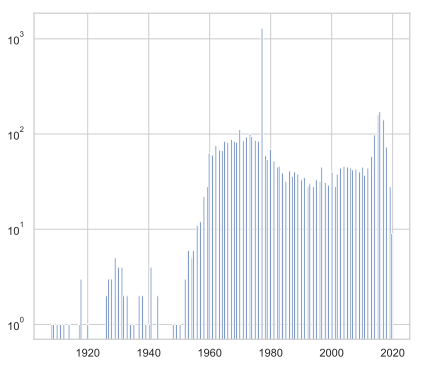

In [137]:
# визуализация распределения квартир по годам
plt.hist(test_data['HouseYear'], bins=200, log=True)
plt.show()

In [139]:
test_data['HouseYear'].value_counts()

1977    1298
2016     172
2015     159
2017     141
1970     111
1973     100
2014      98
1974      94
1972      93
1967      88
1975      86
1971      85
1965      84
1968      84
1976      84
1966      82
1969      82
1962      76
2018      73
1980      69
1963      68
1964      67
1960      63
1961      60
1978      59
2013      58
1979      54
1981      52
2004      46
1983      46
        ... 
1929       5
1954       5
1941       4
1930       4
1931       4
1918       3
1952       3
1927       3
1928       3
1943       2
1933       2
1932       2
1938       2
1937       2
1926       2
1940       1
1948       1
1920       1
1914       1
1912       1
1935       1
1939       1
1917       1
1911       1
1949       1
1910       1
1950       1
1934       1
1909       1
1908       1
Name: HouseYear, Length: 97, dtype: int64

In [140]:
# анализ данных по комнатам
test_data.loc[test_data['LifeSquare'] > test_data['Square']].groupby(['Rooms'])['Square', 'LifeSquare', 'r_squareVSrooms',
                              'r_lifesquareVSsquare'].agg(['mean', 'count'])

Square        LifeSquare       r_squareVSrooms        \
             mean count        mean count            mean count   
Rooms                                                             
1.0     41.057774    93   42.697565    93       41.057774    93   
2.0     62.206100   102   66.987380   102       31.103050   102   
3.0     87.900532    43   89.440191    43       29.300177    43   
4.0    123.837197     3  124.576542     3       30.959299     3   

      r_lifesquareVSsquare        
                      mean count  
Rooms                             
1.0               1.053582    93  
2.0               1.276799   102  
3.0               1.019151    43  
4.0               1.005312     3

In [141]:
# коэффициент перевода из Square в LifeSquare
median_ratio_sqm_to_lifesqm = test_data.loc[test_data['LifeSquare'] < test_data['Square'], 'r_lifesquareVSsquare'].median()
median_ratio_sqm_to_lifesqm

0.6123498930775004

In [142]:
# переназначение ошибочной живой площади исходя из соотношения медианного соотношения кв.м. жилая/общая
test_data.loc[test_data['LifeSquare'] > test_data['Square'], 'LifeSquare'] = test_data['Square'] * median_ratio_sqm_to_lifesqm

In [143]:
# анализ данных по комнатам
test_data.loc[test_data['LifeSquare'] > test_data['Square']].groupby(['Rooms'])['Square', 'LifeSquare', 'r_squareVSrooms',
                              'r_lifesquareVSsquare'].agg(['mean', 'count'])

Empty DataFrame
Columns: [(Square, mean), (Square, count), (LifeSquare, mean), (LifeSquare, count), (r_squareVSrooms, mean), (r_squareVSrooms, count), (r_lifesquareVSsquare, mean), (r_lifesquareVSsquare, count)]
Index: []

In [144]:
# заполнение пустых данных по LifeSquare
test_data.loc[test_data['LifeSquare'].isnull(), 'LifeSquare'] = test_data['Square'] * median_ratio_sqm_to_lifesqm
test_data.loc[test_data['LifeSquare'].isnull()].describe().T


,count,mean,std,min,25%,50%,75%,max
Id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistrictId,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Square,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LifeSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseFloor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseYear,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecology_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id                      5000 non-null int64
DistrictId              5000 non-null int64
Rooms                   5000 non-null float64
Square                  5000 non-null float64
LifeSquare              5000 non-null float64
KitchenSquare           5000 non-null float64
Floor                   5000 non-null int64
HouseFloor              5000 non-null float64
HouseYear               5000 non-null int64
Ecology_1               5000 non-null float64
Ecology_2               5000 non-null int64
Ecology_3               5000 non-null int64
Social_1                5000 non-null int64
Social_2                5000 non-null int64
Social_3                5000 non-null int64
Healthcare_1            2623 non-null float64
Helthcare_2             5000 non-null int64
Shops_1                 5000 non-null int64
Shops_2                 5000 non-null int64
r_squareVSrooms         5000 non-null float

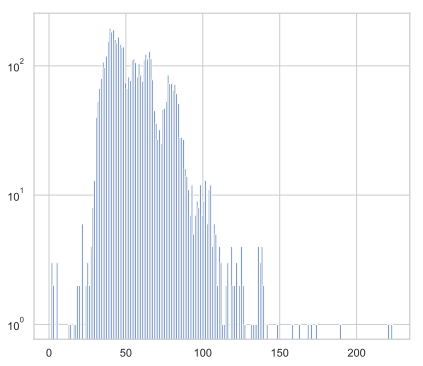

In [148]:
# проверка распределения значения общей площади на экстремумы
plt.hist(test_data['Square'], bins=200, log=True)
plt.show()

In [149]:
# удаление поля с плохим качеством данных
test_data = test_data.drop(['Healthcare_1', 'KitchenSquare'], axis=1)

In [177]:
# создание очищенной базы данных с параметрами
test_clean_data = test_data[feature_name]
test_clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
Helthcare_2,5000.0,1.319400,1.479940,0.000000,0.000000,1.000000,2.000000,6.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,5000.0,35.085665,14.794635,0.333490,23.973083,32.927186,43.639937,136.921090
Rooms,5000.0,1.907400,0.809541,1.000000,1.000000,2.000000,2.000000,7.000000
Shops_1,5000.0,4.242800,4.777365,0.000000,1.000000,3.000000,6.000000,23.000000
Shops_2,5000.0,0.082400,0.275001,0.000000,0.000000,0.000000,0.000000,1.000000
Social_2,5000.0,5406.900000,4026.614773,168.000000,1564.000000,5285.000000,7287.000000,19083.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000


In [178]:
test_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
Id             5000 non-null int64
Helthcare_2    5000 non-null int64
HouseFloor     5000 non-null float64
Square         5000 non-null float64
LifeSquare     5000 non-null float64
Rooms          5000 non-null float64
Shops_1        5000 non-null int64
Shops_2        5000 non-null int64
Social_2       5000 non-null int64
DistrictId     5000 non-null int64
Social_3       5000 non-null int64
HouseYear      5000 non-null int64
Ecology_1      5000 non-null float64
Floor          5000 non-null int64
Ecology_3      5000 non-null int64
Ecology_2      5000 non-null int64
Social_1       5000 non-null int64
dtypes: float64(5), int64(12)
memory usage: 664.1 KB


In [179]:
# предсказание целевого значения для тествой базы
y_test_pred = lr.predict(test_clean_data)

In [182]:
y_test_pred

array([[174061.87877963],
       [215019.31502921],
       [176405.03905378],
       ...,
       [362846.42841305],
       [206312.03811083],
       [214401.35681123]])